Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some
algorithms that are not affected by missing values.
<br>Ans. Missing values means the values which are absent or not there in a dataset
<br>Handling missing values becomes essential because they can lead to bias in results of various models.
<br>Some algorithms which are not affected by missing values are:
1. KNN(K-nearest neighbours)
2. Naive Bayes
3. Random forest

Q2: List down techniques used to handle missing data. Give an example of each with python code.

1. Dropping rows or columns containing large missing values

In [14]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [15]:
data1=pd.DataFrame({"Feature 1":[i for i in range (100)],"feature 2":[None if i in random.sample(range(1,101),73) else i**2 for i in range(0,100)]})

In [16]:
data1.isnull().sum(),data1.shape

(Feature 1     0
 feature 2    68
 dtype: int64,
 (100, 2))

In [17]:
data1.dropna().shape

(32, 2)

2. By using imputation techniques: Mean imputation

In [18]:
data1.fillna(data1['feature 2'].mean()).shape

(100, 2)

In [19]:
data1.fillna(data1['feature 2'].median()).shape

(100, 2)

Median imputation

Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?
<br>When the ration of data is very high or the difference between features of dataset is too high, then its is known as imbalanced data. It is very essential to handle the imbalanced data because the model may be biased towards majority class and may not perform well on minority class.

Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and down-
sampling are required.
<br>Ans. Up-sampling and down-sampling are the methods to handle imbalance data by incresaing or decreasing the data points.

In [20]:
data1=pd.DataFrame({
    'f1':np.random.normal(loc=1,scale=2,size=100),
    'f2':np.random.normal(loc=1,scale=2,size=100),
    'target':[0]*100})
data2=pd.DataFrame({
    'f1':np.random.normal(loc=0,scale=1,size=900),
    'f2':np.random.normal(loc=0,scale=1,size=900),
    'target':[1]*900})
final_data=pd.concat([data1,data2]).reset_index(drop=True)
final_data['target'].value_counts()

1    900
0    100
Name: target, dtype: int64

In [21]:
from sklearn.utils import resample

In [22]:
minority=final_data[final_data['target']==0]
majority=final_data[final_data['target']==1]

In [23]:
upsampled=resample(minority,n_samples=len(majority))
downsampled=resample(majority,n_samples=len(minority))
downsampled['target'].value_counts(),upsampled['target'].value_counts()

(1    100
 Name: target, dtype: int64,
 0    900
 Name: target, dtype: int64)

Q5: What is data Augmentation? Explain SMOTE.
<br>Ans. Data Augmentation is the technique of artificially increasing the training dataset by creating modified copies based on existing data. Data augmentation usually used to handle imbalanced data. There are many techniques to increase the data points and SMOTE is one of them. It stands for Synthetic Minority Oversampling Technique. As the name suggests, it generates the data points for minority class.

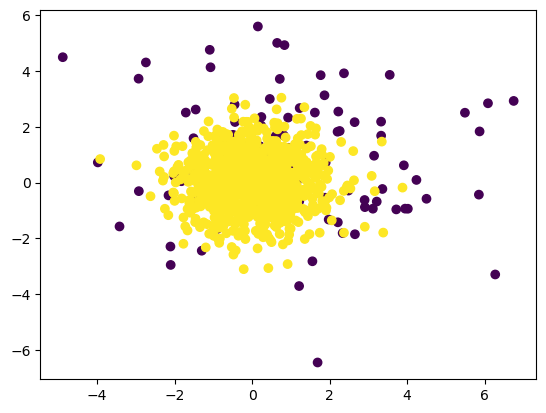

In [24]:
plt.scatter(final_data['f1'],final_data['f2'],c=final_data['target'])

In [25]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(final_data[['f1','f2']],final_data['target'])

In [26]:
df=pd.concat([x,y],axis=1)
df['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

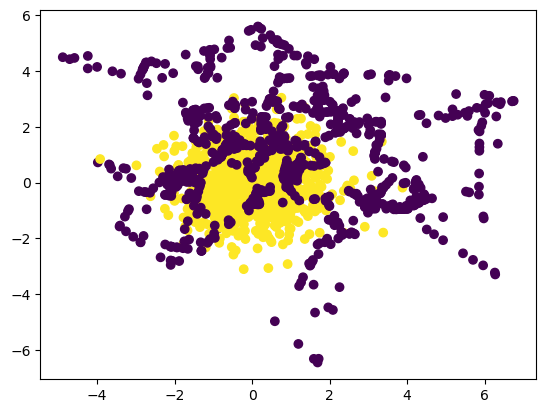

In [27]:
plt.scatter(df['f1'],df['f2'],c=df['target'])

Q6: What are outliers in a dataset? Why is it essential to handle outliers?
<br>Ans. Outliers are certain values in a dataset which differs significantly from other observations. If outliers are present during model training then it can affect the model negatively by giving inaccurate results, therefore it is essential to handle the outliers.

Q7: You are working on a project that requires analyzing customer data. However, you notice that some of
the data is missing. What are some techniques you can use to handle the missing data in your analysis?
<br>Ans. During the process of analyzing customer data, if we notice some missing values in a dataset then there are various techniques to handle those missing data. Some of the techniques are given below.
1. By dropping some rows or columns: This is the sim-lest technique but can lead to loss of information.
2. Using imputation techniques: In this technique, missing values are filled with mean, median or mode depending upon type of data.
3. Using advanced imputation tehniques such as K-nearest neighbour and Naive Bayes.

Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are
some strategies you can use to determine if the missing data is missing at random or if there is a pattern
to the missing data?
<br>Ans. To identify whether a data is missing at random or not, if missing data is dependent on any other data in a dataset, then it is known as missing at random(MAR).

Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the
dataset do not have the condition of interest, while a small percentage do. What are some strategies you
can use to evaluate the performance of your machine learning model on this imbalanced dataset?
<br>Ans. If the data of patients on condition of interest is imbalanced where majority of patients does not have condition of interest while small percentage of patients do, then this data can be handled through various techniques:
1. Upsampling and downsampling: In this method, based on circumstances or conditions, the majority of data can be reduced to the size of minority or minority data can be increased to the size of majority data so that the data becomes balance.
2. Ensemble techniques: In this technique multiple models are combined to improve the overall performance.

Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is
unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to
balance the dataset and down-sample the majority class?
<br>Ans. To balance the dataset and down-sample it, its methods are as follows:
1. Identify the majority and minority class.
2. Determine the ratio between majority and minority class.
3. Randomly select samples from majority class.
4. Create the down-sampled dataset.

Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a
project that requires you to estimate the occurrence of a rare event. What methods can you employ to
balance the dataset and up-sample the minority class?
<br>Ans. To balance the dataset and upsample it, its methods are as follows:
1. Identify the majority and minority class.
2. Determine the ratio between majority and minority class.
3. Duplicate samples from minority class.
4. Create the up-sample dataset.